# **SVM Tutorial**

**Abstract**

This notebook is a simple tutorial for SVM, including introduction to SVM and its core function. At the same time, this notebook will implement a SVM model to show how to build and adjust a SVM model under specific example.

# Basic Idea about SVM

> In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. [From Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)

> This statement told us that SVM is a supervised model for classification and regression. But how dose this model work? Let's begin from some conception.


**Support Vector**

>To understand Support Vector Machine, we need to know what is support vector first. 
>
> If we have a 2D dataset and want to separate it with one line, then we can call this line as hyperplane, and the most close points to the hyperplane are known as support vectors. The distance between two borders is margin. To sperate dataset as clear as possible, we need to maximize the margin.

**SVM**

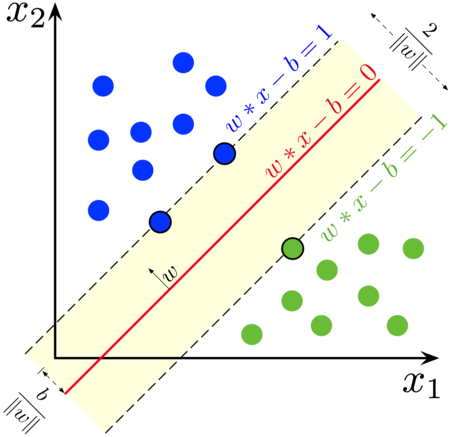

Hard Margin


> For linear separatable dataset like picture above, we can calculate:
>
> $margin = ρ = \frac{2}{||ω||}$
>
> To maximize the margin, we need to maximize ρ, which equals to maximize $ρ^{2}$, we can transfer this to minimize $\frac{1}{2}||ω^{2}||$(multiply $\frac{1}{2}$ to simplify derivation process)
>
> We can slove this problem by construct a Lagrange function, and solve its dual problem to find optimization solution. Finding the best solution is a long math story, and this is just a simple SVM tutorial, so we are going to skip to conclusion, if you are interested about the math, please check this website[SVM math](https://zhuanlan.zhihu.com/p/49331510). Finally we can get:
>
> $f(X) = sign(∑\hat{a}_{i}y_{i}X^{T}X_{i}+\hat{b})$ 
>
> This is linear claasifier we got, and this kind of seperating method is known as hard margin

Soft Margin

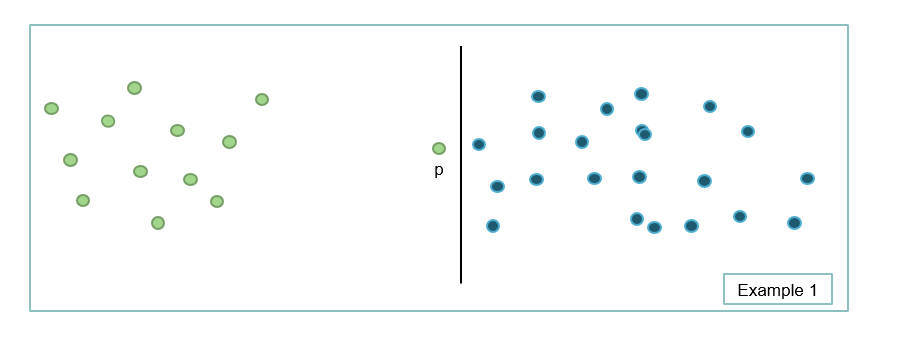

>The hard margin is decided by edge points, but what if the edge points are outliers. As p in example 1, the p point is much closer to bule points rather than green pionts. When we make prediction with this classifier, maybe we will misclassify bule points as green ones. The hard margin is very sensitive to outliers.
> Also, when some datasample is not seperable, the clssifier can't deal with slightly mixed datasets.
> To slove these problem, the concept of soft margin came into our sight

> Soft margin is base on hard margin, its basic idea is to allow some misclassification to get higher robustness. We can use formula as:
>
>$y_{i}(X_{i}^{T}W+b)\geq1$
>
> To minimize the classification we need to add penalty to missclassified points. The most common way is add a hinge lose into our optimization.
>
>$l_{hinge}(z)=max(0,1-z)$
>
> That means if the points is correct, then lose will be 0, otherwise it will be 1-z. Now we can write optimization function as:
>
>$min\frac{1}{2}||W||^{2}+C∑_{i=1}^{n}max(0,1-y_{i}(X_{i}^{T}W+b))$
>
> In this formula, C is called penalty parameter. A small C means a small penalty to misclassification. If we make C infinite, the soft margin will become hard margin. A small C may lead to underfitting while a large C may cause overfitting.
>
> We will skip math process again and jump to answer page, the solution of soft margin SVM will be:

> $\hat{W}= ∑\hat{a}_{i}y_{i}X_{i}$
>
> $\hat{b}=y_{i}-∑\hat{a}_{i}y_{i}X_{j}^{T}X_{i}$
>
> $0<\hat{a}_{j}<C$

> For any point$(X_{i},y_{i})$, if $a_{i}=0$, this point is not a support vector, if $a_{i}>0$, this point is a support vector.
>
> If $0<a_{i}<C$, the point will be on max margin. If $a_{i}=C$ and ${β_{i}<1}$, the sample will be within the max margin. If $ᵦ{i}>1$, the point will be outside of max margin.


Non-Linear SVM

All discussion above is based on one presumption: the dataset can be separated with lines, but in practice, there a more situation where we can't use liner SVM. Draw a curved classifier might be difficult, a simple way is to increase the dimension of dataset. Let's assume a 1D dataset as picture below, it's hard to classify the blue and green pionts.

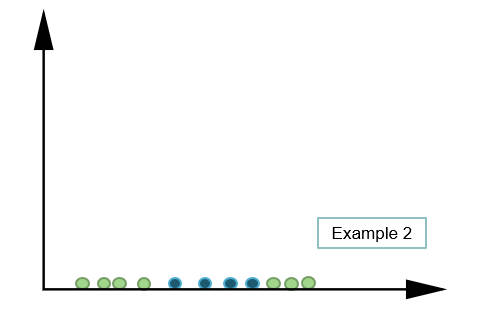

But if we square the values, we can separate them easily. In this case, the square function is the kernel function. 

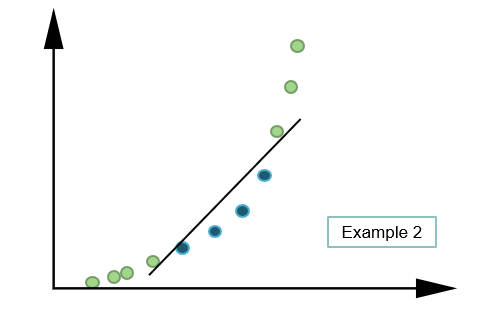

# SVM Kernels

Simply speaking, kernel function is a function used to project the data from input space to feature space. There are a lot of mathematical restrictions for kernel function, so it's hard to design a kernel function. This notebook will introduce some common used kernel function in following part.

**Kernel Functions**

Linear Kernel

> Linear kernel is the inner product of original space:

> $k(x_{1},x_{2})=⟨x_{1},x_{2}⟩$


> Linear kernel is often used when dataset is linear separatable. The input space and feature space have the same dimension. This is a linear classifier, which has less parameters than other kernels and relatively fast. It's simple and interpretable, but it can only solve linear separatabel question.

Ploynomial Kernel

> Ploynomial Kernel could project low dimensional input to high dimensional feature space, require vectors to be orthogonal. Vectors far away from kernel also could make influence on kernel function.

> $k(x_{i},x_{j}) = (x_{i}^{t}x_{j})^{d}, d\geq1$

> The amount of computation will increase with the value of d. This kernel could deal with non-linear problem and works well if we have some presumption about dataset, but when d is big, the model will be very complex, which may lead to overfitting and time-consuming.

Gaussian Kernel

> Gaussian Kernel is based on Radial Basis Function(RBF). RBF is a function takes vector as dependent variable, and calculate scalar quantity with  vector length.

> $k(x_{i},x_{j})=exp(-\frac{||x_{i}-x_{j}||^{2}}{2σ^2}),σ>0$

> Gaussian RBF is a local kernel function, this function could transfer input to higher dimension. When points are far away from kernel, it will have less influence. The $σ$ decides the range of kernel function influence. The range will reduce as $σ$ increase. This kernel have a good performance when dataset has nosie. Compared with ploynomial kernel, Gaussian has fewer parameters. Gaussian Kernel is commonly used and work good on both big and small samples. But Gaussian kernel also have disadvantages, it is difficult to interpret, and works slow when dealing with dual problems. If we didn't find proper paramter, it could overfitting. 

> There are also other RBF kernels, like
Exponential Kernel, LaplacIan Kernal, ANOVA Kernel, Rational Quadratic Kernel, Multiquadric Kernel, Inverse Multiquadric Kernel. Again, because this is a simple tutorial, this notebook will not expand on these kernels.

Sigmoid Kernel

> $k(x_{i},x_{j}) = tanh(βx_{i}^{t}x_{j}+θ),β>0$

> The concept of Sigmoid Kernel comes from neural networks, When we take sigmoid as kernel function, the SVM will be a multilayer Perceptron Neural Network. The SVM theoretically makes it get global rather than local optimum and ensures its good generalization ability.

**How to Chose a Kernel Function?**

Cross-Validation

> Try diffierent kernel function, find the most accurate model

Hybrid Kernel Function

> Hybrid kernel is using mixtures of kernels , which could result in having both good interpolation and extrapolation abilities. From [Improved SVM regression using mixtures of kernels](https://www.semanticscholar.org/paper/Improved-SVM-regression-using-mixtures-of-kernels-Smits-Jordaan/9e7fa5be24ddda41c9dc9283c94c52f1ae2add6b)

Advice from [Machine Learning Course Andrew Ng](https://www.coursera.org/specializations/machine-learning-engineering-for-production-mlops?utm_source=gg&utm_medium=sem&utm_campaign=28-MLOps-DL.ai-US&utm_content=B2C&campaignid=13572037851&adgroupid=120618068101&device=c&keyword=andrew%20ng%20machine%20learning&matchtype=b&network=g&devicemodel=&adpostion=&creativeid=528598123150&hide_mobile_promo&gclid=CjwKCAjwjtOTBhAvEiwASG4bCMBFE3bjvjSlBvcg1Roaslqzwsy6jHjyEpDNtQtL2y01IylRA2CYYhoCxS4QAvD_BwE)



> *   If the number of features are big and have high dimensional features, this sample may be linear separable, chose linear regression or linear SVM
*   If the amount of features are not high dimensional with a normal size of sample, consider Gaussian Kernel.
*   If the dataset have few features but with a big sample, we need to add some features, then deal it as the first situation.



Example of diffierent kernels

In [4]:
from sklearn import svm
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
X = np.arange(-5.0,10.0,0.2)
X = np.random.permutation(X)
x = [[i] for i in X]
Y = X**2.0 + 1.5*X + 2 + np.random.random(X.shape)*5.0
Y

array([  4.49071978,  39.98611964,  11.16811094,   9.45868229,
       113.21238667,   7.80218714,  51.23654549,  22.30437372,
         7.03430515,   4.85249793,  21.14875225,  21.25215101,
        15.19572305,   9.59172326,  13.34120486,  71.85601427,
        56.46421529,   3.28861261,   5.13043096,  76.62800874,
         3.54042613,   8.06923039,   9.52304605,  72.91406886,
        80.90599181,  36.52416592,  14.47742585,   5.51377815,
        10.02804761,   5.99224075,  16.5209793 ,   7.89092736,
       111.71012116,  19.36723706,  14.62922436, 102.56146224,
         7.9003132 ,  64.8883067 ,   7.15455708,  92.59834093,
         3.38847798,  23.37990882,  25.29666471,  10.61064065,
        10.70862763,  93.53590548,  97.09728763,   4.85265675,
        16.6612522 , 107.51671491,  43.06967356,  31.91900944,
        85.82255464,  44.97855774,  30.59310954,  23.64954264,
        58.56201288,  17.96803615,   6.0145561 ,  13.66152858,
         3.78977815,  35.57618902,  86.24311173,  12.28

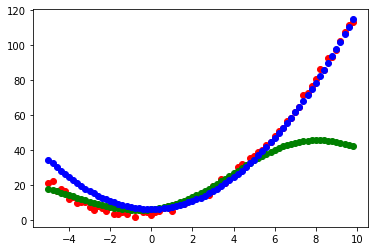

In [ ]:
y = [i for i in Y]

rbf = svm.SVR(kernel='rbf', C=1)
poly = svm.SVR(kernel='poly', C=1, degree=2)

rbf.fit(x,y)
poly.fit(x,y)

rbf_result = rbf.predict(x)
poly_result = poly.predict(x)

plt.plot(X,Y,'o',color='r')
plt.plot(X,rbf_result,'o',color='g')
plt.plot(X,poly_result,'o',color='b')
plt.show()

As we can get from above experiment, the polynomial kernel have a good performance on simulating polynomial dataset. The Gaussian kernel simulating good before curve, but performs bad at the end

#When We Should Use SVM

**Advantages**

*   Since SVM is a convex optimization problem, the solution obtained must be a global optimum rather than a local optimum.
*   Not only can deal with linear linear problems but also good for nonlinear problems (with the kernel trick).
*   Data with a high-dimensional sample space can also use SVM, because the complexity of the dataset only depends on the support vector rather than the dimension of the dataset, which avoids the "curse of dimensionality".
*   The theoretical basis is relatively sound. The neural network is more like a black box.






**Disadvantages**



*   The solution of the quadratic programming problem will involve the calculation of the m-order matrix (m is the number of samples), so SVM is not suitable for very large data sets. (SMO algorithm can alleviate this problem)
*   Only fit for binary classification problems. (SVM's generalization SVR is also suitable for regression problems; multi-classification problems can be solved by a combination of multiple SVMs)



# Build A SVM with Sklearn

After all those theories, finally we get into practical part. In this part we will look into SVM model building with Sklearn. We are going to build a SVM model with iris dataset from sklearn.

The algorithm library of SVM in sklearn is divided into two categories, one is the classification library, mainly including LinearSVC, NuSVC and SVC three categories, the other is the regression library, including SVR, NuSVR and LinearSVR three categories. All related modules are wrapped in the sklearn.svm.


**Instance of Building a SVM**

In [9]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

iris = datasets.load_iris()

Firstly, we separate the dataset and build a linear model, and get its accuracy

In [11]:
X = iris.data
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [12]:
linear = svm.SVC(kernel='linear', C=10).fit(x_train,y_train)

Use accuracy and AUC and ROC to evaluate the model

In [16]:
y_score = linear.decision_function(x_test)
print(y_score.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
y = label_binarize(y, classes=[0, 1, 2])
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

(75, 3)


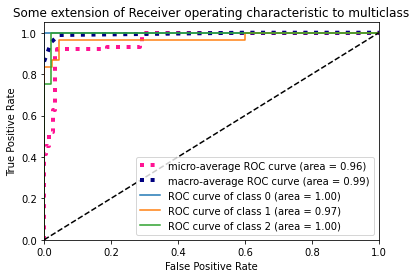

In [20]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(linear.score(x_test,y_test))

0.9777777777777777


To make a simple visualization the separation in this example, we only pick 2 main features(sepal width and sepal length) in this dataset, and train a new model

In [ ]:
X = iris.data[:,:2]
linear = svm.SVC(kernel='linear', C=10).fit(X,y)

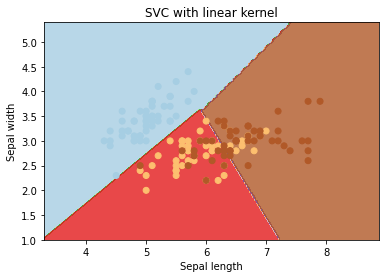

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
predict_y = linear.predict(np.c_[xx.ravel(), yy.ravel()])
predict_y = predict_y.reshape(xx.shape)
plt.contourf(xx, yy, predict_y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

The second model will be polynomial kernel.

In [ ]:
poly_model = svm.SVC(kernel='poly', C=10).fit(x_train,y_train)
print(poly_model.score(x_test,y_test))

0.9555555555555556


Paint the classifer and points for polynomial kernel.

In [ ]:
poly_model = svm.SVC(kernel='poly', C=10).fit(X,y)

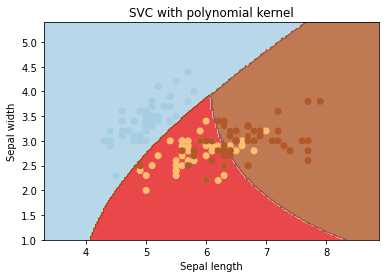

In [ ]:
plt.subplot(1, 1, 1)
predict_y = poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
predict_y = predict_y.reshape(xx.shape)
plt.contourf(xx, yy, predict_y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel')
plt.show()

The last model will use RBF as kernel

In [ ]:
rbf_model = svm.SVC(kernel='rbf', C=10).fit(x_train,y_train)
print(rbf_model.score(x_test,y_test))

0.9777777777777777


Also paint the classifier and points

In [ ]:
rbf_model=svm.SVC(kernel='rbf', C=1).fit(X,y)

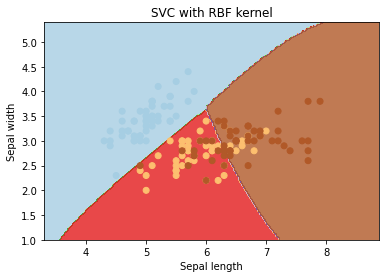

In [ ]:
plt.subplot(1, 1, 1)
predict_y = rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
predict_y = predict_y.reshape(xx.shape)
plt.contourf(xx, yy, predict_y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

We build 3 diffierent models for iris dataset, they all have a high accuracy, but 3 models seems to be pretty similar because of dataset. In following part we will construct some special dataset and figure out diffierent kernels and hyperparameters in SVM.

# SVM Hyperparameters

**Parameters and Hyper Parameters**

Gernally speaking, parameters are build inside of the model, which means user are not going to change them in most situation. The support vector in SVM is an example of model parameter. 
Hyperparameter is set outside of the model, user can not estimate its value from dataset.It could be set by users to improve the ability of model.

**SVM Hyperparameters**

There are some important hyperparameter for SVM, the hyperparameter depends on the kernel user chose. All kernel have hyperparameter C, which means penalty parameter. The higher C is, the less model could tolerate with misclassification. And all SVM have kernel as hyperparameter. If we chose polynomial kernel, we will have a degree hyperparameter. If we use Gaussian kernel, we will have gamma.

When we are building a SVM model, we need to choose our kernel, and adjust hyperparameters. In following example, this notebook will show diffierent kernel selection and hyperparameter adjustment

Let's begin from building a special dataset

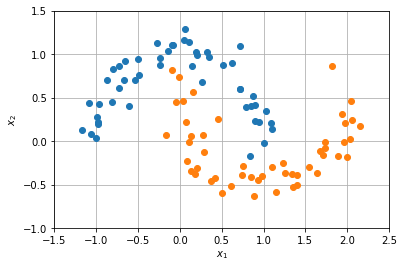

In [ ]:
from sklearn.datasets import make_moons
 
X, y = make_moons(n_samples=100, noise=0.15, random_state=30)
 
 
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0],X[:, 1][y == 0],'o')
    plt.plot(X[:, 0][y == 1],X[:, 1][y == 1],'o')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
 
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Let's begin with linear SVM to separate it

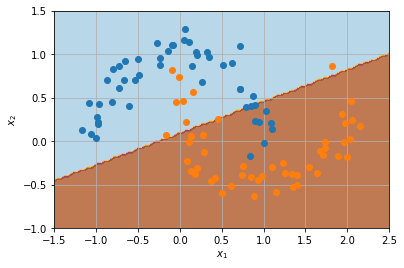

In [ ]:
linear = svm.SVC(kernel='linear',C=10).fit(X,y)
 
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.Paired, alpha=0.8)
 
plot_predictions(linear, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Of course linear can't separate this kind of dataset. How about polynomial?

We begin from degree=3(avoid chose 2 or 2n because these number dosen't match with the sample)

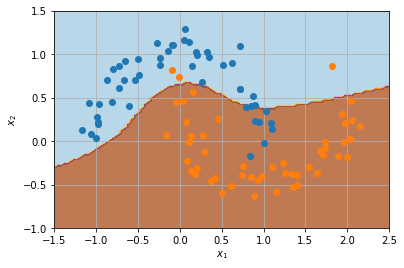

In [ ]:
poly = svm.SVC(kernel='poly',degree=3 ,C=10).fit(X,y)
 
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.Paired, alpha=0.8)
 
plot_predictions(poly, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Can we do better? How about increase degree?

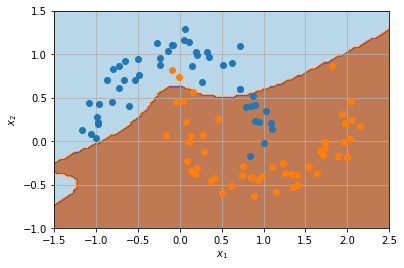

In [ ]:
poly = svm.SVC(kernel='poly',degree=5 ,C=10).fit(X,y)
 
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.Paired, alpha=0.8)
 
plot_predictions(poly, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

No big changes, what if we keep increasing the degree:

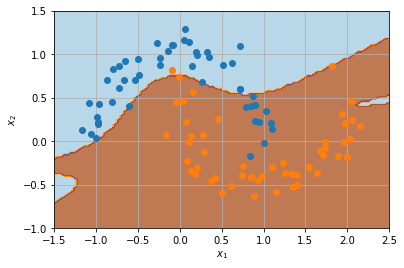

In [ ]:
poly = svm.SVC(kernel='poly',degree=7 ,C=10).fit(X,y)
 
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.Paired, alpha=0.8)
 
plot_predictions(poly, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Simply add degree seems dosen't work, how about combine polynomial with linear classifier?

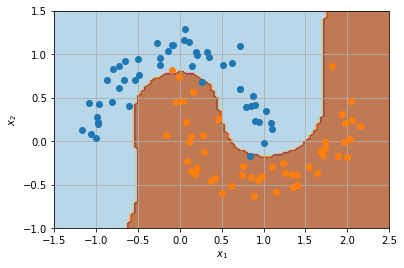

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC
poly_linear = Pipeline((('poly_features', PolynomialFeatures(degree=3)),('scaler', StandardScaler()),
                               ('svm_clf', LinearSVC(C=10))))
poly_linear.fit(X,y)
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.Paired, alpha=0.8)
 
plot_predictions(poly_linear, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

When we combine two kernels togther, the SVM works much better.

Then we will try Gaussian Kernel

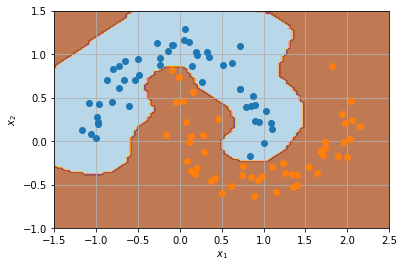

In [ ]:
rbf = Pipeline((('scaler', StandardScaler()),('svm_clf', SVC(kernel='rbf', gamma=5, C=10))))

rbf.fit(X,y)
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.Paired, alpha=0.8)
 
plot_predictions(rbf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

If we reduce gamma

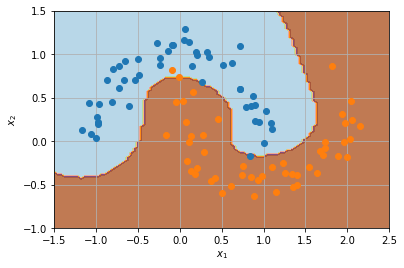

In [ ]:
rbf = Pipeline((('scaler', StandardScaler()),('svm_clf', SVC(kernel='rbf', gamma=1, C=10))))

rbf.fit(X,y)
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.Paired, alpha=0.8)
 
plot_predictions(rbf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Decrase gamma and increse C:

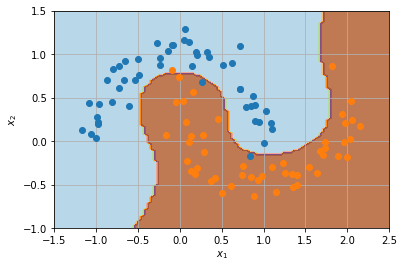

In [ ]:
rbf = Pipeline((('scaler', StandardScaler()),('svm_clf', SVC(kernel='rbf', gamma=0.1, C=1000))))

rbf.fit(X,y)
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.Paired, alpha=0.8)
 
plot_predictions(rbf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

As we could see from test above, diffierent kernels have advantages on diffierent problem, sometimes we can combine kernels to get a better result. A bigger C will increase accuracy sometimes, but may cause overfitting. Increasing gamma makes the Gaussian curve narrower, so each instance has a smaller sphere of influence, and the decision boundary ends up being irregular, wiggling around individual instances.Reducing gamma makes the Gaussian curve wider, so instances have a larger sphere of influence and the decision boundary is smoother

**Conclusion**

In this notebook, we discussed the basic idea and theories of SVM, kernel of SVM, also build up specific instance and showed how hyperparameter will influence the result.

**Reference**

*   [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
*   [coursera](https://www.coursera.org/specializations/deep-learning?utm_source=gg&utm_medium=sem&utm_campaign=17-DeepLearning-US&utm_content=B2C&campaignid=904733485&adgroupid=46370300620&device=c&keyword=coursera%20artificial%20intelligence&matchtype=b&network=g&devicemodel=&adpostion=&creativeid=314072424647&hide_mobile_promo&gclid=CjwKCAjwjtOTBhAvEiwASG4bCJiUNk8kugebortPxOA6bM9rz4689spXIfltei2C4MAcPhRvP7I5YBoC0XMQAvD_BwE)
*   [Math about SVM](https://zhuanlan.zhihu.com/p/49331510)
*   [Prove SVM](https://www.cnblogs.com/wj-1314/p/9489427.html)